In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
med_df = pd.read_csv(r'https://github.com/dsrscientist/dataset4/raw/main/medical_cost_insurance.csv')
med_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
med_df.shape

(1338, 7)

Categorical Features:

*   sex
*   smoker
*   region





In [6]:
med_df[['sex','smoker','region']].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [7]:
med_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
regions = {
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
}
med_df['region'] = med_df['region'].replace(regions)

gender = {
    'male':0,
    'female':1
}
med_df['sex'] = med_df['sex'].replace(gender)

smoker_status = {
    'yes':0,
    'no':1
}

med_df['smoker'] = med_df['smoker'].replace(smoker_status)

med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Exploratory Data Analysis

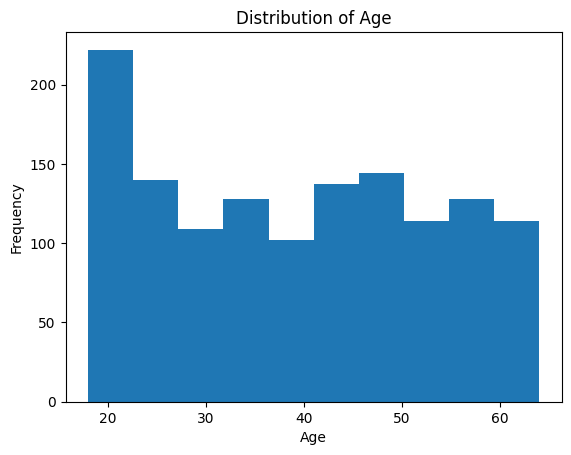

In [9]:
plt.hist(med_df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

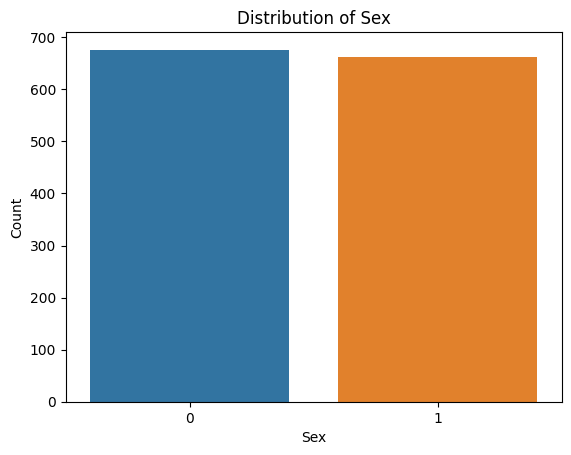

In [10]:
sb.countplot(x='sex', data = med_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

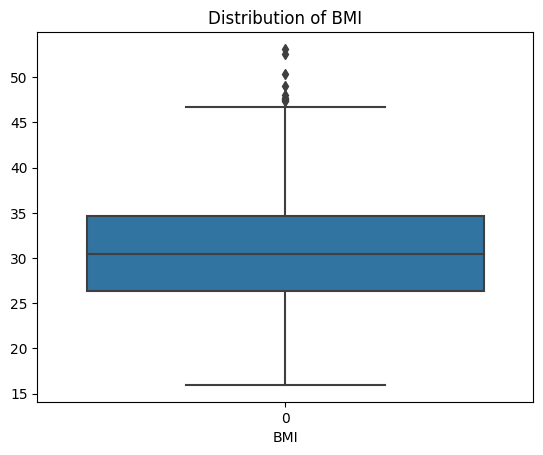

In [11]:
sb.boxplot(med_df['bmi'])
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

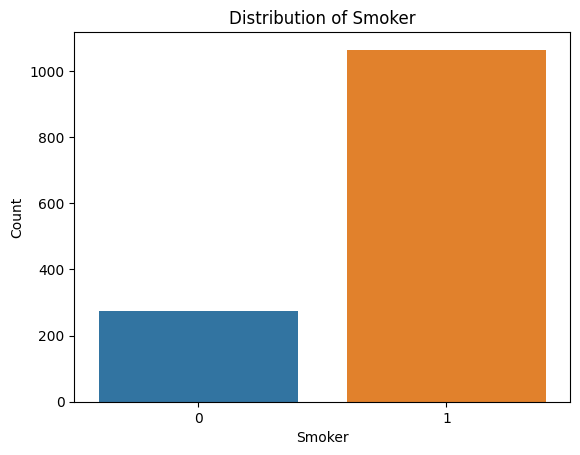

In [12]:

sb.countplot(x = 'smoker', data=med_df)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Distribution of Smoker')
plt.show()

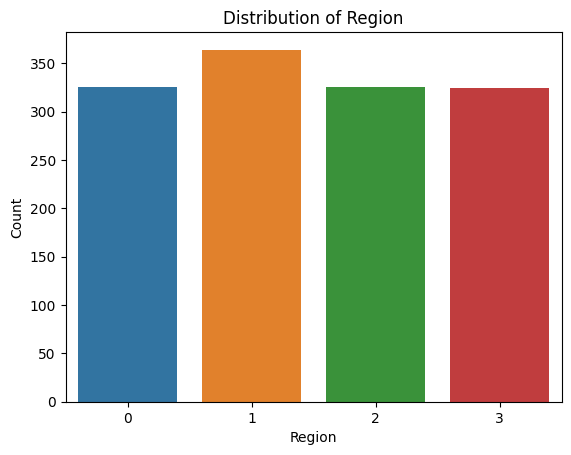

In [13]:
sb.countplot(x = 'region', data=med_df)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Region')
plt.show()

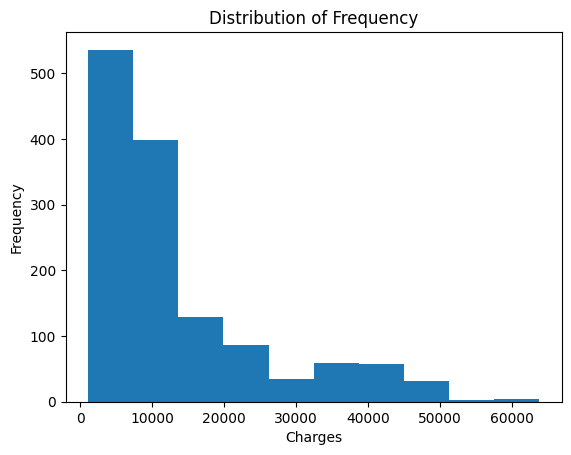

In [14]:
plt.hist(med_df['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Frequency')
plt.show()

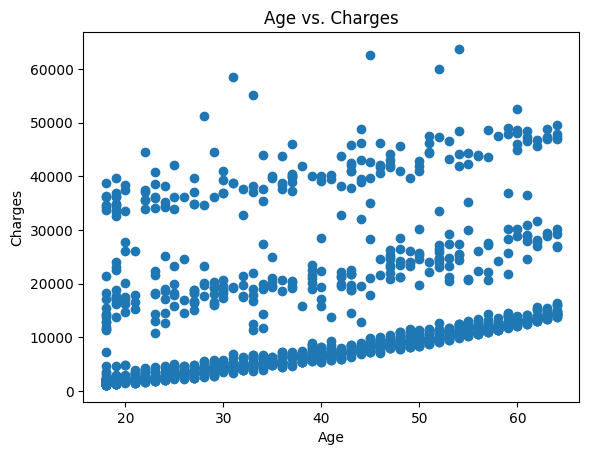

In [15]:
#Age vs Charges

plt.scatter(med_df['age'],med_df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()

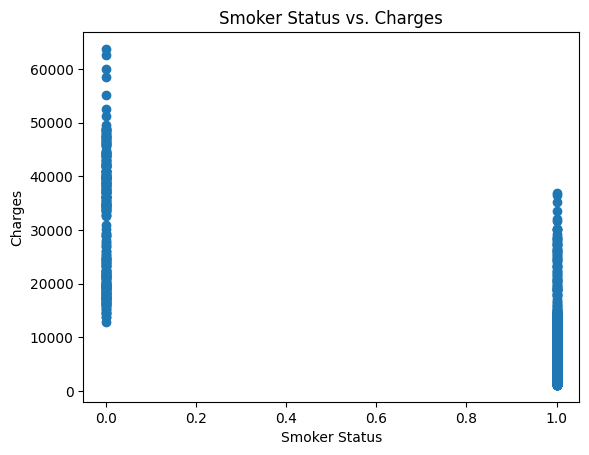

In [16]:
plt.scatter(med_df['smoker'],med_df['charges'])
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.title('Smoker Status vs. Charges')
plt.show()

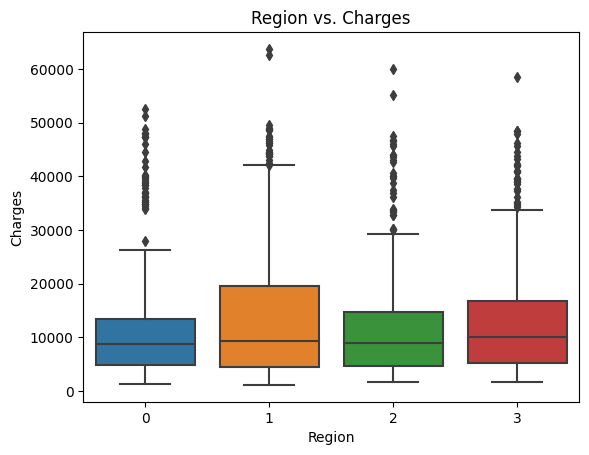

In [17]:
sb.boxplot(x='region', y='charges', data=med_df)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

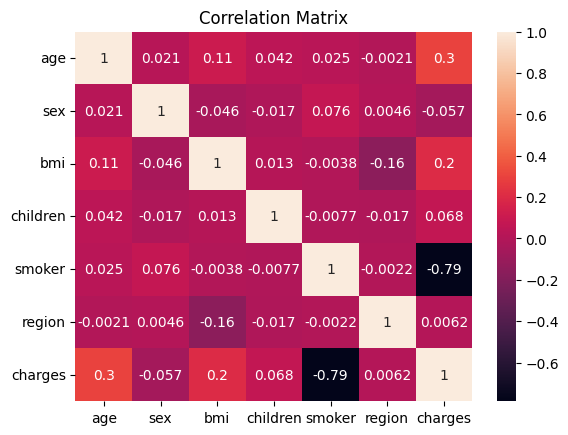

In [18]:
correlation_matrix = med_df.corr()
sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Splitting the Features and Target variables

In [19]:
features = med_df.drop(columns='charges',axis=1)
target = med_df['charges']

In [20]:
print(features)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [21]:
print(target)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [22]:
#Splitting the data into test and training data

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=50)

In [23]:
print(X_test.shape)
print(X_train.shape)
print(med_df.shape)

(268, 6)
(1070, 6)
(1338, 7)


In [24]:
#Traing the model

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
test_data_pred=lr_model.predict(X_test)
train_data_pred=lr_model.predict(X_train)

In [25]:
#Evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test,test_data_pred))
mae = mean_absolute_error(y_test,test_data_pred)
r2_sq = r2_score(y_test,test_data_pred)
print("Root Mean Squared Error of Test data: ", rmse)
print("Mean Absolute Error of Test data: ", mae)
print("R-sqaured of Test data: ", r2_sq)

Root Mean Squared Error of Test data:  5848.439422875687
Mean Absolute Error of Test data:  3949.1597402875404
R-sqaured of Test data:  0.786612425321401


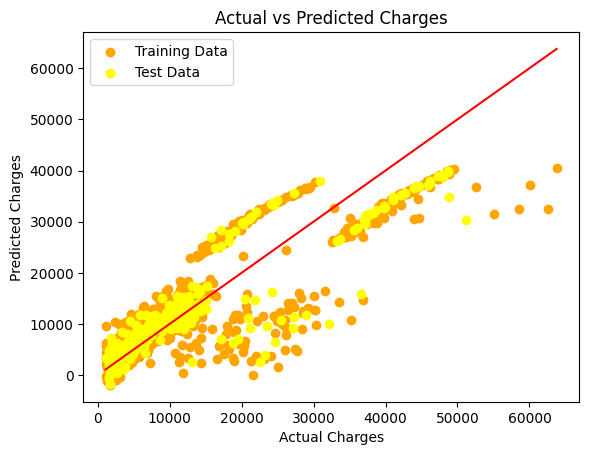

In [26]:
plt.scatter(y_train,train_data_pred,color='orange',label='Training Data')
plt.scatter(y_test,test_data_pred,color='yellow',label='Test Data')
plt.plot([min(y_train),max(y_train)],[min(y_train),max(y_train)],color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.show()

In [213]:
rmset = np.sqrt(mean_squared_error(y_train,train_data_pred))
maet = mean_absolute_error(y_train,train_data_pred)
r2_sqt = r2_score(y_train,train_data_pred)
print("Root Mean Squared Error of Train data: ", rmset)
print("Mean Absolute Error of Train data: ", maet)
print("R-sqaured of Train data: ", r2_sqt)

Root Mean Squared Error of Train data:  6097.066074267929
Mean Absolute Error of Train data:  4200.118764738537
R-sqaured of Train data:  0.7399254680443018


In [34]:
#Predicting the Cost of Insurance
input_data = {'age': 41,
        'sex':1,
        'bmi':43.98,
        'children':3,
        'smoker':0,
        'region':3
        }
index=[1]
df_test = pd.DataFrame (input_data,index)
df_test

,age,sex,bmi,children,smoker,region
1,41,1,43.98,3,0,3


In [35]:
Insurance_cost = lr_model.predict(df_test)
print(Insurance_cost)

[37859.9410152]
